In [155]:
import pandas as pd

hourly = pd.read_csv("clean_hourly_data.csv")
print(hourly.head())


         date  hour  energy_demand  day_of_week  month  is_weekend  \
0  2018-04-25    21         27.743            2      4           0   
1  2018-04-25    22         13.996            2      4           0   
2  2018-04-26     0         28.295            3      4           0   
3  2018-04-26     1         19.651            3      4           0   
4  2018-04-26     2         33.894            3      4           0   

   prev_hour_demand  prev_2_hour_demand  prev_3_hour_demand  day_of_year  \
0             5.018              43.732               8.712          115   
1            27.743               5.018              43.732          115   
2            13.996              27.743               5.018          116   
3            28.295              13.996              27.743          116   
4            19.651              28.295              13.996          116   

   week_of_year  rolling_mean_3  rolling_mean_6  rolling_std_3  
0            17       25.497667       31.445500      19.4

In [156]:
X = hourly[["hour", "day_of_week", "month", "is_weekend"]]
y = hourly["energy_demand"]


In [157]:
X = hourly[[
    "hour",
    "day_of_week",
    "month",
    "is_weekend",
    "prev_hour_demand",
    "prev_2_hour_demand",
    "prev_3_hour_demand"
]]


In [158]:
split_index = int(len(hourly) * 0.8)

train = hourly[:split_index]
test = hourly[split_index:]

X_train = train.drop(columns=["energy_demand", "date"])
y_train = train["energy_demand"]

X_test = test.drop(columns=["energy_demand", "date"])
y_test = test["energy_demand"]


In [159]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=700,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.9,
    random_state=42
)
model.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.03
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",700
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.9
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",5
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft

In [160]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report
import pandas as pd
import numpy as np

# Predict
y_pred = model.predict(X_test)

# R2
r2 = r2_score(y_test, y_pred)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# Convert regression output to classes for a classification report
q1, q2 = y_train.quantile([0.33, 0.66])
bins = [-np.inf, q1, q2, np.inf]
labels = ["Low", "Medium", "High"]
y_test_class = pd.cut(y_test, bins=bins, labels=labels).astype(str)
y_pred_class = pd.cut(y_pred, bins=bins, labels=labels).astype(str)

print("R2 Score:", r2)
print("Accuracy (%):", r2 * 100)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("\nClassification Report (Low/Medium/High Demand):")
print(classification_report(y_test_class, y_pred_class, labels=labels, zero_division=0))


R2 Score: 0.8741866110338317
Accuracy (%): 87.41866110338317
MAE: 7.120615501270955
MSE: 87.66955356436213
RMSE: 9.363202099942205

Classification Report (Low/Medium/High Demand):
              precision    recall  f1-score   support

         Low       0.90      0.69      0.78        13
      Medium       0.59      0.83      0.69        12
        High       0.90      0.75      0.82        12

    accuracy                           0.76        37
   macro avg       0.80      0.76      0.76        37
weighted avg       0.80      0.76      0.76        37



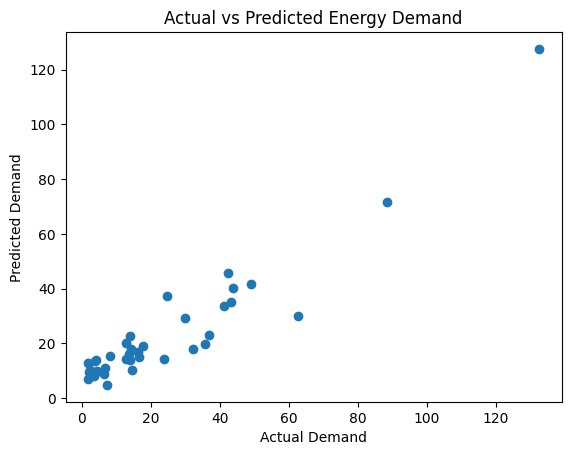

In [161]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Energy Demand")
plt.show()


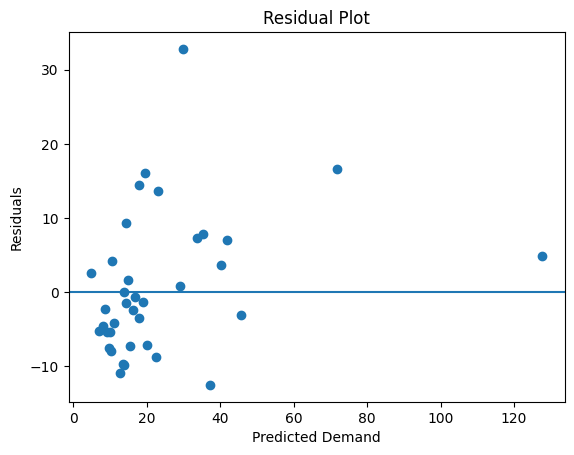

In [162]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Demand")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


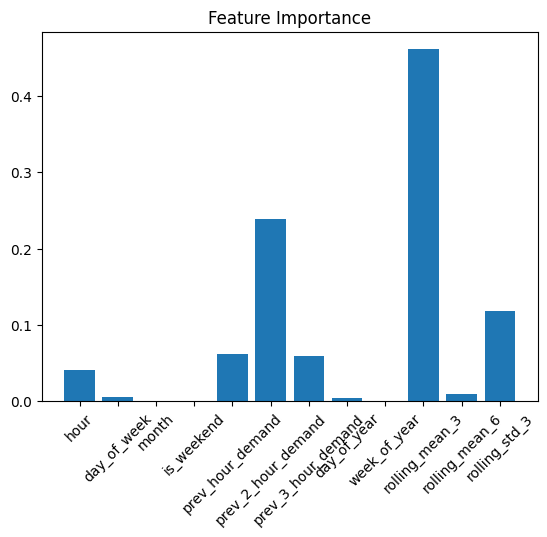

In [163]:
importance = model.feature_importances_
features = X_train.columns

plt.figure()
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()


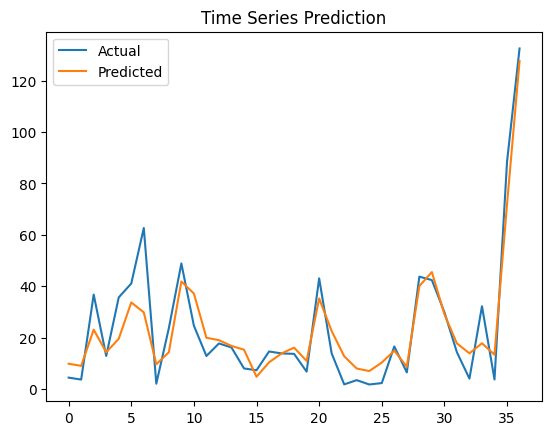

In [164]:
plt.figure()
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Time Series Prediction")
plt.show()


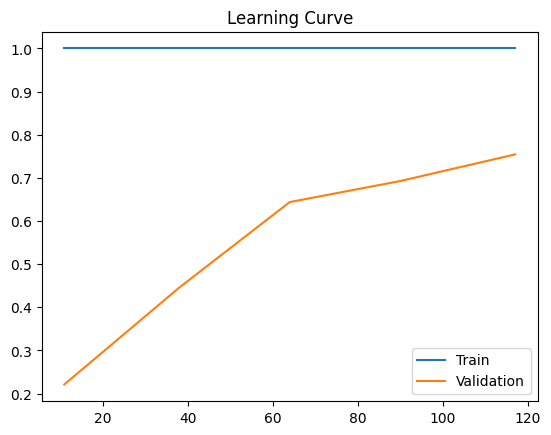

In [165]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation")
plt.legend()
plt.title("Learning Curve")
plt.show()


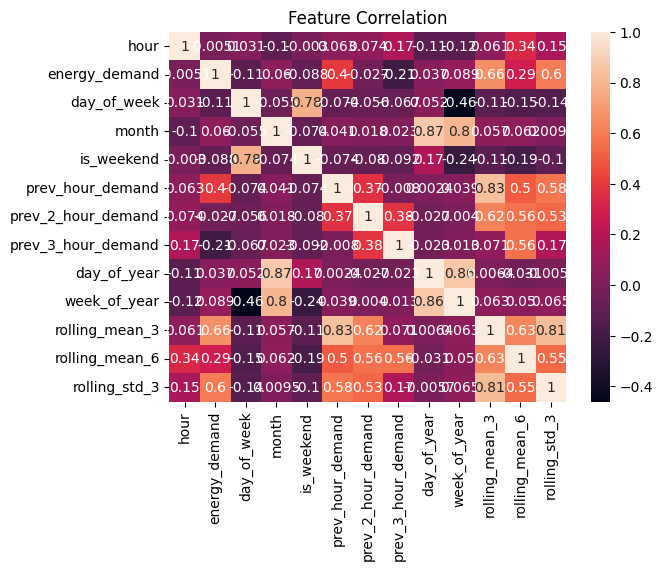

In [166]:
import seaborn as sns

plt.figure()
sns.heatmap(hourly.corr(numeric_only=True), annot=True)
plt.title("Feature Correlation")
plt.show()


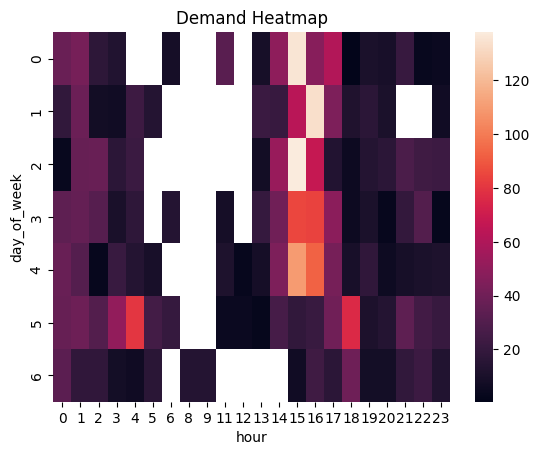

In [167]:
pivot = hourly.pivot_table(
    values="energy_demand",
    index="day_of_week",
    columns="hour",
    aggfunc="mean"
)

plt.figure()
sns.heatmap(pivot)
plt.title("Demand Heatmap")
plt.show()


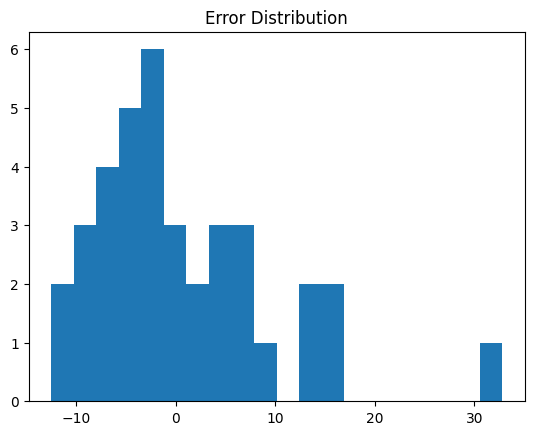

In [168]:
plt.figure()
plt.hist(y_test - y_pred, bins=20)
plt.title("Error Distribution")
plt.show()


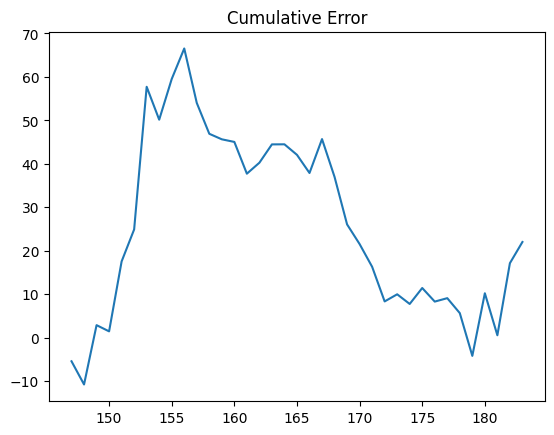

In [169]:
plt.figure()
plt.plot(np.cumsum(y_test - y_pred))
plt.title("Cumulative Error")
plt.show()


In [170]:
import joblib
joblib.dump(model, "energy_demand_model.pkl")

['energy_demand_model.pkl']

In [171]:
print(X_train.columns)


Index(['hour', 'day_of_week', 'month', 'is_weekend', 'prev_hour_demand',
       'prev_2_hour_demand', 'prev_3_hour_demand', 'day_of_year',
       'week_of_year', 'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3'],
      dtype='object')
